# Data Preprocessing & Linear Regression Case Study

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('CarSelling Portal Data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
# Name coulmns that have missing values
missing_values = [c for c in data.columns if data[c].isnull().sum() > 0]
missing_values

['Price', 'EngineV']

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
# Imputing the missing values in 'Price', 'EngineV' using KNN
data[['Price', 'EngineV']] = data.groupby(['Brand'])['Price', 'EngineV'].transform(lambda x: x.fillna(x.median()))

/var/folders/dk/_cfdg6bd67zbn7r4nmk7qpnm0000gn/T/ipykernel_20019/2523012393.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[['Price', 'EngineV']] = data.groupby(['Brand'])['Price', 'EngineV'].transform(lambda x: x.fillna(x.median()))


In [8]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4345.000000,4345,4345.000000,4345.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19168.256838,NaN,161.237284,2.777107,NaN,NaN,2006.550058
std,NaN,25107.999851,NaN,105.705797,4.979468,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7100.000000,NaN,86.000000,1.900000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

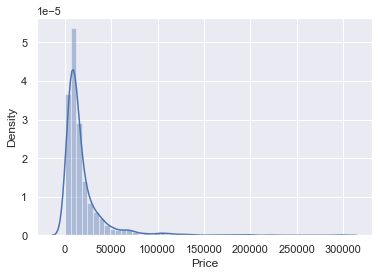

In [9]:
sns.distplot(data['Price'])

### Dealing with outliers

In [10]:

q = data['Price'].quantile(0.98)
data_1 = data[data['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4258,4258.000000,4258,4258.000000,4258.000000,4258,4258,4258.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1630,NaN,NaN,1972,3860,NaN
mean,NaN,16545.266313,NaN,164.306247,2.752757,NaN,NaN,2006.373650
std,NaN,15779.097949,NaN,104.519164,5.024534,NaN,NaN,6.669212
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19999.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

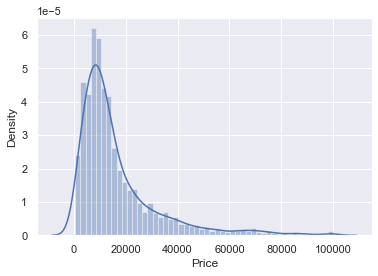

In [11]:
sns.distplot(data_1['Price'])

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

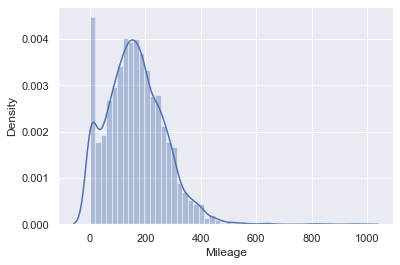

In [12]:
sns.distplot(data_1['Mileage'])

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4213,4213.000000,4213,4213.000000,4213.000000,4213,4213,4213.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,922,NaN,1612,NaN,NaN,1942,3818,NaN
mean,NaN,16613.719193,NaN,160.304534,2.756667,NaN,NaN,2006.463565
std,NaN,15792.623736,NaN,96.604315,5.050585,NaN,NaN,6.599046
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,19999.000000,NaN,227.000000,3.000000,NaN,NaN,2012.000000


/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

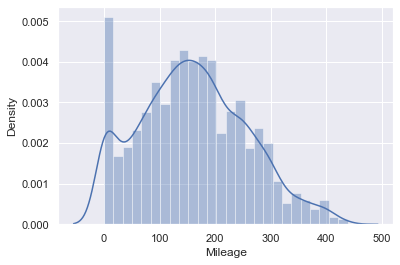

In [14]:
sns.distplot(data_2['Mileage'])

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

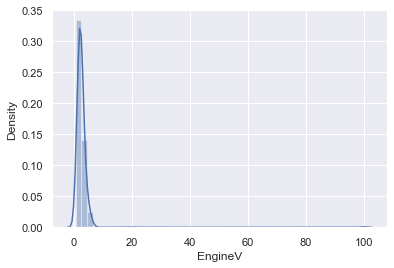

In [15]:
sns.distplot(data['EngineV'])

In [16]:
data_3 = data_2[data_2['EngineV']<6.5]

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

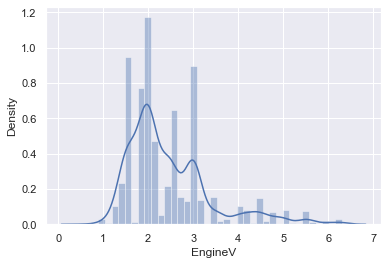

In [17]:
sns.distplot(data_3['EngineV'])

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

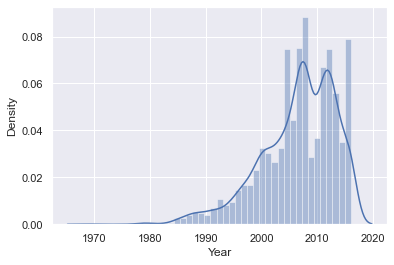

In [18]:
sns.distplot(data['Year'])

In [19]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
print(q)

1987.0


/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

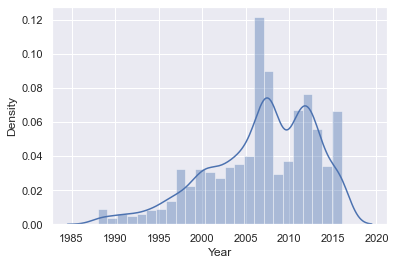

In [20]:
sns.distplot(data_4['Year'])

In [21]:
data_cleaned = data_4.reset_index(drop=True)

In [22]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4132,4132.000000,4132,4132.000000,4132.000000,4132,4132,4132.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,902,NaN,1567,NaN,NaN,1922,3743,NaN
mean,NaN,16841.731150,NaN,159.291626,2.455837,NaN,NaN,2006.778074
std,NaN,15838.482941,NaN,96.201223,0.940426,NaN,NaN,6.114289
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7300.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,156.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20300.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Transforming the data to suit Linear Regression

### Relaxing the assumptions

In [23]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
4127,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
4128,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
4129,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
4130,Toyota,14200.0,sedan,31,2.5,Petrol,yes,2014,9.560997


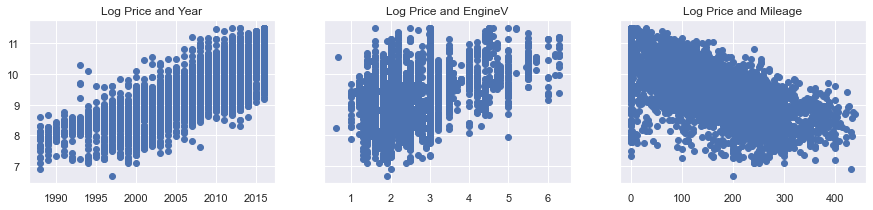

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [25]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [26]:
data_cleaned.shape

(4132, 8)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i)
for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [28]:
vif

,VIF,features
0,3.715239,Mileage
1,10.553084,Year
2,7.819160,EngineV


In [29]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [30]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [31]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [32]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [33]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [34]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [35]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [37]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [45]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
y_hat = reg.predict(x_train)

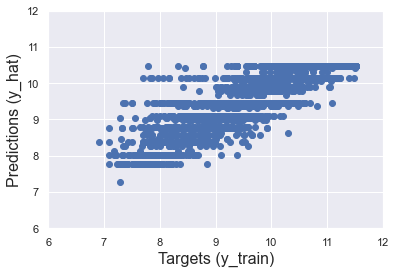

In [41]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=16)
plt.ylabel('Predictions (y_hat)',size=16)
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

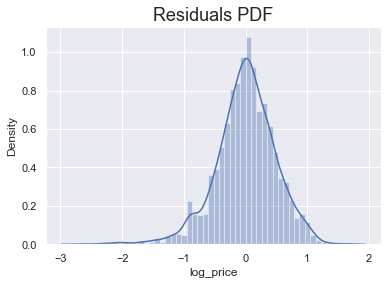

In [42]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [44]:
reg.score(x_train,y_train)

0.6531710715227852

### Finding the weights and bias

In [111]:
reg.intercept_

9.415239458021299

In [112]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [113]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


In [114]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [128]:
y_hat_test = reg.predict(x_test)

In [139]:
y_hat_test

array([ 9.27664312,  8.16030544,  8.92973788,  8.91784179,  9.33728047,
        9.96598334,  9.9114155 ,  9.9208174 ,  9.35716755, 10.42271629,
        8.88752402,  8.55174331,  8.60959284,  9.49497114,  9.01780685,
        9.27066723, 10.07414053,  9.37336324, 10.53476323,  9.69141643,
        9.38234396, 10.35957622,  8.71643055,  9.48127657, 10.07112477,
       10.72044951,  7.68659457,  7.84581633, 10.49103837, 10.1682424 ,
        9.65242235,  9.46172765,  9.43026705, 10.04071585,  9.89620074,
        9.33587239,  9.25909284, 10.18407499,  9.20222613,  9.72462687,
        9.83481651,  9.89572534, 10.05561933,  9.98099629,  8.88752402,
        9.04923537,  8.17265027, 10.18207097, 11.25678153,  8.51181367,
        7.8157843 ,  7.84132356,  9.27957204,  9.92592817,  9.82959497,
        9.44735305,  9.64082592,  9.9961603 , 10.472667  ,  9.0113213 ,
        9.43101748,  8.90881239,  9.29181481,  8.58519974,  9.17074707,
        9.89582068,  8.1066477 ,  8.9386957 ,  8.81242218,  7.80

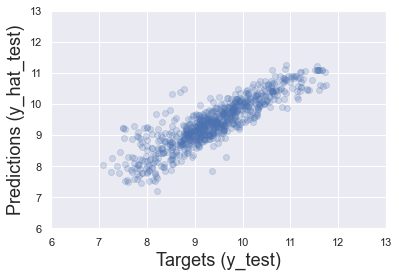

In [129]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [141]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head(10)

,Prediction
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49
5,21289.80
6,20159.19
7,20349.62
8,11581.54
9,33614.62


In [142]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00
5,21289.80,20000.00
6,20159.19,38888.00
7,20349.62,16999.00
8,11581.54,12500.00
9,33614.62,41000.00


In [143]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [144]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00
5,21289.80,20000.00
6,20159.19,38888.00
7,20349.62,16999.00
8,11581.54,12500.00
9,33614.62,41000.00


In [148]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

Mean Absolute Error: 0.31570343796349676
Mean Squared Error: 0.18474579456749005
Root Mean Squared Error: 0.42982065395637986


In [150]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [151]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08
5,21289.80,20000.00,-1289.80,6.45
6,20159.19,38888.00,18728.81,48.16
7,20349.62,16999.00,-3350.62,19.71
8,11581.54,12500.00,918.46,7.35
9,33614.62,41000.00,7385.38,18.01
